**Importing and cleaning dataset**

In [ ]:
import pandas as pd
D=pd.read_excel('NIRF - 2019 data.xlsx',sheet_name='Sheet1')
D.drop(index=[69,70,71,72,73],inplace=True)
D.sort_values('Rank',inplace=True)
D.columns[D.isnull().sum()>10].tolist()
D.drop(columns=['UG 5 year  2017-18 Median salary',
 'UG 5 year 2016-17 Median salary',
 'UG 5 year 2015-16 Median salary',
 'PG 3 year 2017-18 Median salary',
 'PG 3 year 2016-17 Median salary',
 'PG 3 year 2015-16 Median salary',
 'PG(-Integrated) 5 year 2017-18 Median salary',
 'PG(-Integrated) 5 year 2016-17 Median salary',
 'PG(-Integrated) 5 year 2015-16 Median salary',
 'PG 6 year 2017-18 Median salary',
 'PG 6 year 2016-17 Median salary',
 'PG 6 year 2015-16 Median salary'],axis=1,inplace=True)
D

,Rank,Sanctioned Intake,2017-18 Sanctioned Intake,2016-17 Sanctioned Intake,2015-16 Sanctioned Intake,Actual Student Strength,Actual Student Strength UG,Male Students,Female Students,Outside State students,Outside country students,Economically backward students,Socially challenged students,Fee reimbursement from Govt,Fee reimbursement from institution,Fee reimbursement from Private bodies,2012-13 admitted students,2013-14 lateral entry,2015-16 graduating students,2015-16 placed students,2015-16 higher education students,2013-14 admitted students,2014-15 lateral entry,2016-17 graduating students,2016-17 placed students,2016-17 higher education students,2014-15 admitted students,2015-16 lateral entry,2017-18 graduating students,2017-18 placed students,2017-18 higher education students,Total PHD students,Total PHD graduated,2017-18 Annual Capital Expenditure,2016-17 Annual Capital Expenditure,2015-16 Annual Capital Expenditure,2017-18 Annual Oprerational Expenditure,2016-17 Annual Operational Expenditure,2015-16 Annual Operational Expenditure,Patents published,...,PREMP,UG 4 year 2017-18 Median salary,UG 4 year 2016-17 Median salary,UG 4 year 2015-16 Median salary,PG 2 year 2017-18 Median salary,PG 2 year 2016-17 Median salary,PG 2 year 2015-16 Median salary,PCS 1,PCS 2,PCS 3,FSR_pred,SS_pred,FRU_pred,FQE_pred,TLR,TLR_pred,Faculty Exp <8,Faculty exp <8,Faculty exp between 8 and 15,Faculty exp >15,Unnamed: 103,GUE_pred,GPHE_pred,MS_pred,GPHD_pred,GO,GO_pred,Publications,Top25pp,Total Citation Count,FRQ,RD_pred,WD_pred,ESCS_pred,PCS_pred,OI,OI_pred,Unnamed: 120,RP,RP_pred
0,1.0,5300.0,1512.0,1465.0,1073.0,5629.0,4072.0,4862.0,767.0,4713.0,35.0,720.0,2734.0,89.0,2800.0,315.0,1498.0,0.0,1348.0,925.0,180.0,1507.0,0.0,1384.0,984.0,154.0,1482.0,0.0,1146.0,946.0,161.0,1962.0,521.0,2.181408e+09,1.161995e+09,1.577880e+09,6.700647e+09,5.807283e+09,4.563662e+09,418.0,...,100.00,1306000.0,1020000.0,1000000.0,875000.0,900000.0,825000.0,"Y, 80",Y,"Y, 80",29.998779,15.376520,26.710000,17.006901,24.381,22.988610,100,100.0,204.0,310.0,NaN,14.644928,26.964596,18.735860,12.139919,23.5720,20.222688,NaN,NaN,NaN,19.620495,13.307576,12.225938,19.921723,16.356000,16.356,13.414114,NaN,NaN,NaN
1,2.0,5654.0,1886.0,1886.0,851.0,5100.0,3542.0,4393.0,707.0,4782.0,26.0,590.0,2272.0,2381.0,0.0,64.0,1664.0,0.0,1371.0,789.0,172.0,1660.0,0.0,1384.0,709.0,92.0,1902.0,0.0,1448.0,759.0,172.0,2283.0,904.0,2.471031e+09,1.577328e+09,1.362761e+09,4.084181e+09,3.593306e+09,3.193626e+09,129.0,...,90.85,1306000.0,1100000.0,1200000.0,1200000.0,875000.0,1264236.0,"y, 80%",Y,"Y, 60%",26.658356,14.927724,23.476922,14.964542,22.271,20.988951,138,138.0,99.0,237.0,NaN,14.730964,24.770505,19.527506,17.179037,21.8675,19.920792,NaN,NaN,NaN,20.918162,14.978956,14.188236,18.254161,14.824000,14.824,11.672460,NaN,NaN,NaN
2,3.0,5144.0,1624.0,1624.0,871.0,5570.0,3920.0,4973.0,597.0,4176.0,41.0,1274.0,2667.0,1177.0,0.0,78.0,1667.0,0.0,1240.0,1018.0,50.0,1717.0,0.0,1257.0,917.0,36.0,1621.0,0.0,1212.0,929.0,63.0,2768.0,828.0,3.295333e+08,6.078299e+08,8.036267e+08,4.583255e+09,4.185270e+09,3.729495e+09,367.0,...,89.61,1011000.0,956757.0,880000.0,793047.0,814116.0,751733.0,"Yes, more than 60%",Yes,"Yes, more than 60%",30.000000,15.674260,19.357080,19.921949,22.961,20.685906,248,248.0,134.0,187.0,NaN,14.558107,27.146081,18.007389,16.294883,20.6045,20.527418,NaN,NaN,NaN,18.114718,12.141981,11.559358,17.145008,12.824000,12.824,10.199537,NaN,NaN,NaN
3,9.0,14240.0,4440.0,4440.0,2740.0,13334.0,10805.0,7533.0,5801.0,181.0,517.0,541.0,11286.0,4522.0,0.0,436.0,3685.0,7.0,3228.0,1629.0,179.0,3774.0,7.0,3043.0,1243.0,170.0,4001.0,10.0,3423.0,1138.0,190.0,2286.0,732.0,2.339312e+08,2.618694e+08,2.184259e+08,2.063356e+09,1.869355e+09,2.360101e+09,54.0,...,70.13,500000.0,450000.0,500000.0,420000.0,400000.0,355000.0,"Yes, more than 80%",Yes,"Yes, more than 80%",22.092133,17.514772,8.952477,13.106377,15.781,15.362901,278,278.0,202.0,420.0,NaN,14.211706,19.833011,13.067094,15.107269,16.6090,16.726613,NaN,NaN,NaN,

**TEACHING,LEARNING AND RESOURCES**



Student Strength(SS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

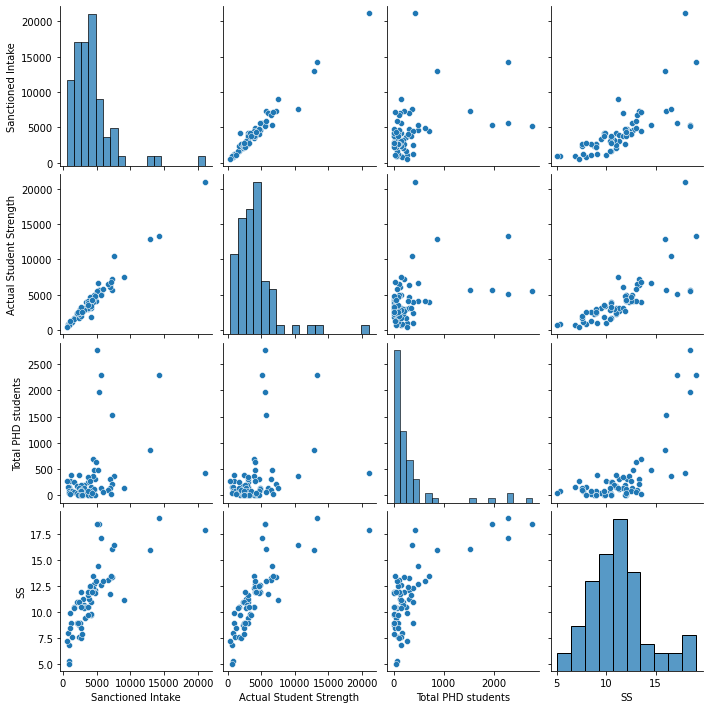

In [ ]:
#SS
d1=D[['Sanctioned Intake','Actual Student Strength','Total PHD students','SS']]
import seaborn as sns
sns.pairplot(data=d1) 
import numpy as np
d1['Sanctioned Intake']=np.log(d1['Sanctioned Intake']+1)
d1['Actual Student Strength']=np.log(d1['Actual Student Strength']+1)
d1['Total PHD students']=np.log(d1['Total PHD students']+1)
d1['Actual Student Strength'].skew()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(d1.iloc[:,0:3])
model = LinearRegression()
model.fit(x_poly,d1.iloc[:,-1])
d1['SS_pred']=model.predict(x_poly)
for ix in d1.index:
  if(d1.loc[ix]['SS_pred']>d1['SS'].max() or d1.loc[ix]['SS_pred']<d1['SS'].min()):
    d1.loc[ix]['SS_pred']=d1.loc[ix]['SS']

Faculty-Student Ratio

In [ ]:
#FSR*
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
d2=D[['Regular faculty in prev year','Faculty with Ph.D or higher','Sanctioned Intake','Total PHD students','FSR']]
d2['N']=d2['Sanctioned Intake']+d2['Total PHD students']
d2['Ratio']=np.divide(d2['Regular faculty in prev year'],d2['N'])
d2
d2['Total PHD students']=np.log(d2['Total PHD students']+1)    
d2['Ratio']=np.log(d2['Ratio']+1)
import numpy as np
for col in ['Sanctioned Intake']:
  d2[col]=d2[col]**(1/6)
d2.drop(columns=['N','Regular faculty in prev year','Faculty with Ph.D or higher'],inplace=True)
d2.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(d2.iloc[:,0:3])
model = LinearRegression()
model.fit(x_poly,d2.iloc[:,-1])
d2['FSR_pred']=model.predict(x_poly)
for ix in d2.index:
  if(d2.loc[ix]['FSR_pred']>d2['FSR'].max() or d2.loc[ix]['FSR_pred']<d2['FSR'].min()):
    d2.loc[ix]['FSR_pred']=d2.loc[ix]['FSR']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

  Faculty with PHD(or equivalent) and experience

In [ ]:
#FQE*
import numpy as np
d3=D[['Faculty with Ph.D or higher','Actual faculty in prev year','Regular faculty in prev year','Current available faculty','Faculty exp <8','Faculty exp between 8 and 15','Faculty exp >15','FQE']]
d3['Faculty exp between 8 and 15'].dtype
d3.isnull().sum()
d3.dropna(inplace=True)
d3['MAX']=d3[['Actual faculty in prev year','Regular faculty in prev year']].max(axis=1)
d3['FRA']=np.divide(d3['Faculty with Ph.D or higher'],d3['MAX'])*100
for col in ['Faculty exp <8','Faculty exp between 8 and 15','Faculty exp >15']:
  d3[col]=3*np.divide(d3[col],d3['Current available faculty'])
d3['Faculty exp <8']
d3['FE']=0.0
d3['1']=1
d3['min1']=d3[['Faculty exp <8','1']].min(axis=1)
d3['min2']=d3[['Faculty exp between 8 and 15','1']].min(axis=1)
d3['min3']=d3[['Faculty exp >15','1']].min(axis=1)
d3['FE']=3*d3['min1']+3*d3['min2']+4*d3['min3']
d3['FQ']=0.0
for val in d3.index:
  if d3.loc[val,'FRA']<95:
    d3.loc[val,'FQ']=np.divide(10*d3.loc[val,'FRA'],95)
  else:    
    d3.loc[val,'FQ']=10
d3['FQE_pred']=d3['FQ']+d3['FE'] 
for ix in d3.index:
  if(d3.loc[ix]['FQE_pred']>d3['FQE'].max() or d3.loc[ix]['FQE_pred']<d3['FQE'].min()):
    d3.loc[ix]['FQE_pred']=d3.loc[ix]['FQE']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

Financial Resources and their Utilization

In [ ]:
#FRU
d4=D[['Actual Student Strength','Total PHD students','2017-18 Annual Capital Expenditure','2016-17 Annual Capital Expenditure','2015-16 Annual Capital Expenditure','2017-18 Annual Oprerational Expenditure','2016-17 Annual Operational Expenditure','2015-16 Annual Operational Expenditure','FRU']]
d4.loc[0,"Actual Student Strength"]=5629
import numpy as np
d4.isnull().sum()
d4['Avg Annual Exp 3yrs']=np.divide(d4['2017-18 Annual Capital Expenditure']+d4['2016-17 Annual Capital Expenditure']+d4['2015-16 Annual Capital Expenditure'],3.0)
d4['Avg Operational Exp 3yrs']=np.divide(d4['2017-18 Annual Oprerational Expenditure']+d4['2016-17 Annual Operational Expenditure']+d4['2015-16 Annual Operational Expenditure'],3.0)
d4['BC']=np.divide(d4['Avg Annual Exp 3yrs'],d4['Actual Student Strength']+d4['Total PHD students'])
d4['BO']=np.divide(d4['Avg Operational Exp 3yrs'],d4['Actual Student Strength']+d4['Total PHD students'])
d=d4[['BC','BO','FRU']]
d['BC']=np.log(d['BC'])
d['BO']=np.log10(d['BO'])
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(d.iloc[:,0:2])
model = LinearRegression()
model.fit(x_poly,d.iloc[:,-1])
d['FRU_pred']=model.predict(x_poly)
for ix in d.index:
  if(d.loc[ix]['FRU_pred']>d['FRU'].max() or d.loc[ix]['FRU_pred']<d['FRU'].min()):
    d.loc[ix]['FRU_pred']=d.loc[ix]['FRU']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

**Outreach and Inclusivity**

Region Diversity(RD)

In [ ]:
#OI
#Region Diversity (RD)
DF=D[['Actual Student Strength','Outside State students','Outside country students','RD']]
DF
import numpy as np
DF['State_percent']=np.divide(DF['Outside State students'],DF['Actual Student Strength'])
DF['Country_percent']=np.divide(DF['Outside country students'],DF['Actual Student Strength'])
DF
#import seaborn as sns
#sns.pairplot(data=DF[['State_percent','Country_percent','RD']])
from scipy import stats
DF['State_percent'],lamd1=stats.boxcox(DF['State_percent'])
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='box-cox')
X=pt.fit_transform(DF.iloc[:,1:2])
dn=pd.DataFrame(data=X,columns=['Country_percent'])
DF['Country_percent']=dn['Country_percent']
A=DF[['State_percent','Country_percent','RD']]
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(A.iloc[:,0:2])
model = LinearRegression()
model.fit(x_poly,A.iloc[:,-1])
A['RD_pred']=model.predict(x_poly)
for ix in A.index:
  if(A.loc[ix]['RD_pred']>A['RD'].max() or A.loc[ix]['RD_pred']<A['RD'].min()):
    A.loc[ix]['RD_pred']=A.loc[ix]['RD']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Women Diversity

In [ ]:
#WD*
import numpy as np
DF=D[['Female Students','Actual Student Strength','Women faculty Count','Total Faculty Count','WD']]
DF.dropna(inplace=True)
DF
DF['Women_stud_percent']=np.divide(DF['Female Students'],DF['Actual Student Strength'])*100
DF.isnull().sum()
DF['Women_Faculty_percent']=np.divide(DF['Women faculty Count'],DF['Total Faculty Count'])*100
Z=DF[['Women_stud_percent','Women_Faculty_percent','WD']]
Z['Women_Faculty_percent']=np.divide(Z['Women_Faculty_percent']-Z['Women_Faculty_percent'].mean(),Z['Women_Faculty_percent'].std()) 
Z['Women_stud_percent']=np.divide(Z['Women_stud_percent']-Z['Women_stud_percent'].mean(),Z['Women_stud_percent'].std())
for val in Z.index:
  if (Z.loc[val,'Women_stud_percent']>=50):
    Z.loc[val,'WS']=50
  else:
    Z.loc[val,'WS']=Z.loc[val,'Women_stud_percent']  
  
  if (Z.loc[val,'Women_Faculty_percent']>=20):
    Z.loc[val,'WF']=20
  else:
    Z.loc[val,'WF']=Z.loc[val,'Women_Faculty_percent']    
Z['WD_pred']=0.3*Z['WS']+0.75*Z['WF']
for ix in Z.index:
  if(Z.loc[ix]['WD_pred']>Z['WD'].max() or Z.loc[ix]['WD_pred']<Z['WD'].min()):
    Z.loc[ix]['WD_pred']=Z.loc[ix]['WD']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

Economically and Socially challenged Students(ESCS)

In [ ]:
#ESCS
DF=D[['Fee reimbursement from institution','Actual Student Strength UG','ESCS']]
DF
DF.isnull().sum()
import numpy as np
DF['Percent']=np.divide(DF['Fee reimbursement from institution'],DF['Actual Student Strength UG'])*100
DF['Percent'].value_counts()
X=DF[['Percent','ESCS']]
X
Y=X.replace([-np.inf,np.inf],np.nan)
Y.dropna(inplace=True)
Y['Percent']=np.divide(Y['Percent']-Y['Percent'].mean(),Y['Percent'].std()) 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(Y.iloc[:,0:1])
model = LinearRegression()
model.fit(x_poly,Y.iloc[:,-1])
Y['ESCS_pred']=model.predict(x_poly)
for ix in Y.index:
  if(Y.loc[ix]['ESCS_pred']>Y['ESCS'].max() or Y.loc[ix]['ESCS_pred']<Y['ESCS'].min()):
    Y.loc[ix]['ESCS_pred']=Y.loc[ix]['ESCS']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Facilities for physically challenged students (PCS)

In [ ]:
#PCS
A=D[['PCS 1','PCS 2','PCS 3','PCS']]
import re
for col in ['PCS 1','PCS 2','PCS 3']:
  for ix in A.index:
    if(A.loc[ix,col]=='Y' or A.loc[ix,col]=='Yes'):
      A[col].replace(A.loc[ix,col],20,inplace=True)
    elif(A.loc[ix,col]=='No' or A.loc[ix,col]=='N'):
      A[col].replace(A.loc[ix,col],0,inplace=True)  
    elif(A.loc[ix,col]!=np.nan):
      z=str(A.loc[ix,col]).split(',')
      if(z[0]=='Yes' or z[0]=='Y' or z[0]=='y' or z[0]=='yes'):
        if(len(z[1])==2 or len(z[1])==3 or len(z[1])==4):
          A[col].replace(A.loc[ix,col],np.divide(float(re.findall(r'\d+',z[1])[0]),100)*20.0,inplace=True)
        elif(len(z[1])>4):
          y=str(z[1]).split(' ')
          if(y[1]=='more'):
            A[col].replace(A.loc[ix,col],np.divide(float(re.findall(r'\d+',z[1])[0])+10,100)*20.0,inplace=True)
          elif(y[1]=='less'):
            A[col].replace(A.loc[ix,col],np.divide(float(re.findall(r'\d+',z[1])[0])-10,100)*20.0,inplace=True)
    else:
      pass
A.rename(columns={'PCS 1':'pcs1','PCS 2':'pcs2','PCS 3':'pcs3'},inplace=True)

from scipy import stats
A['pcs1'],lamd1=stats.boxcox(A['pcs1'])
A['pcs3'],lamd3=stats.boxcox(A['pcs3'])
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
Y=pt.fit_transform(A.iloc[:,1:2])
dn=pd.DataFrame(data=Y,columns=['pcs2'])
A['pcs2']=dn['pcs2']
A['pcs2'].value_counts()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(A.iloc[:,0:3])
model = LinearRegression()
model.fit(x_poly,A.iloc[:,-1])
A['PCS_pred']=model.predict(x_poly)
for ix in A.index:
  if(A.loc[ix]['PCS_pred']>A['PCS'].max() or A.loc[ix]['PCS_pred']<A['PCS'].min()):
    A.loc[ix]['PCS_pred']=A.loc[ix]['PCS']

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


TypeError: ignored

**Graduation Outcomes**

Metrics for no. of PHD Students graduated (GPHD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


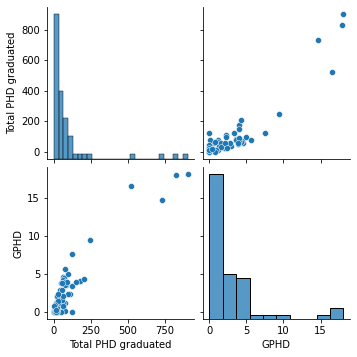

In [ ]:
#OI
#GPHD
F=D[['Total PHD graduated','GPHD']]
F['Total PHD graduated'].skew()
import seaborn as sns
sns.pairplot(data=F)
F['Total PHD graduated']=np.divide(F['Total PHD graduated']-F['Total PHD graduated'].mean(),F['Total PHD graduated'].std())
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(F.iloc[:,0:1])
model = LinearRegression()
model.fit(x_poly,F.iloc[:,-1])
F['GPHD_pred']=model.predict(x_poly)
for ix in F.index:
  if(F.loc[ix]['GPHD_pred']>F['GPHD'].max() or F.loc[ix]['GPHD_pred']<F['GPHD'].min()):
    F.loc[ix]['GPHD_pred']=F.loc[ix]['GPHD']

Median Salary

In [ ]:
#MS
import numpy as np
import matplotlib.pyplot as plt
MS=D[['UG 4 year  2017-18 Median salary','UG 4 year 2016-17 Median salary','UG 4 year 2015-16 Median salary','PG 2 year 2017-18 Median salary','PG 2 year 2016-17 Median salary','PG 2 year 2015-16 Median salary','MS']]
MS['UG_AVG']=np.divide(MS['UG 4 year  2017-18 Median salary']+MS['UG 4 year 2016-17 Median salary']+MS['UG 4 year 2015-16 Median salary'],3.0)
MS['PG_AVG']=np.divide(MS['PG 2 year 2017-18 Median salary']+MS['PG 2 year 2016-17 Median salary']+MS['PG 2 year 2015-16 Median salary'],3.0)
MS['Total']=np.divide(MS['UG_AVG']+MS['PG_AVG'],2.0)
from scipy import stats
MS['Total'],lamd1=stats.boxcox(MS['Total'])
S=MS[['Total','MS']]
S.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(S.iloc[:,0:1])
model = LinearRegression()
model.fit(x_poly,S.iloc[:,-1])
S['pred']=model.predict(x_poly)
for ix in S.index:
  if(S.loc[ix]['pred']>S['MS'].max() or S.loc[ix]['pred']<S['MS'].min()):
    S.loc[ix]['pred']=S.loc[ix]['MS']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Metric for University examinations

In [ ]:
#GUE
B=D[['Sanctioned Intake','2015-16  graduating students','2016-17 graduating students','2017-18 graduating students','GUE']]
import numpy as np
B['Passed_Avg']=np.divide(B['2015-16  graduating students']+B['2016-17 graduating students']+B['2017-18 graduating students'],3.0)
B['Ng']=np.divide(B['Passed_Avg'],B['Sanctioned Intake'])*100
for ix in B.index:
  B.loc[ix,'C3']=15*min(np.divide(B.loc[ix,'Ng'],80),1)
import seaborn as sns
B
B['C3'].skew()
C=B[['C3','GUE']]
from scipy import stats
C['C3'],lamd1=stats.boxcox(C['C3'])
print(f"the value of lambda is:{lamd1}")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(C.iloc[:,0:1])
model = LinearRegression()
model.fit(x_poly,C.iloc[:,-1])
C['GUE_pred']=model.predict(x_poly)
for ix in C.index:
  if(C.loc[ix]['GUE_pred']>C['GUE_pred'].max() or C.loc[ix]['GUE_pred']<C['GUE_pred'].min()):
    C.loc[ix]['GUE_pred']=C.loc[ix]['GUE_pred']

the value of lambda is:0.6928046268094723


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Combined Metric for Placement and Higher Studies

In [ ]:
#GPHE*
DF=D[['2015-16  graduating students','2015-16 placed students','2015-16 higher education students','2016-17 graduating students','2016-17 placed students','2016-17 higher education students','2017-18 graduating students','2017-18 placed students','2017-18 higher education students','GPHE']]
DF
import numpy as np
DF['Tot1']=DF['2015-16  graduating students']+DF['2016-17 graduating students']+DF['2017-18 graduating students']+0.0
DF['Tot2']=DF['2015-16 higher education students']+DF['2016-17 higher education students']+DF['2017-18 higher education students']+0.0
DF['Tot3']=DF['2015-16 placed students']+DF['2016-17 placed students']+DF['2017-18 placed students']+0.0
DF['Np']=np.divide(DF['Tot3'],DF['Tot1'])*100
DF['Nhs']=np.divide(DF['Tot2'],DF['Tot1'])*100
Final=DF[['Np','Nhs','GPHE']]
Final
for val in Final.index:
  if (Final.loc[val,'Np']>=50):
    Final.loc[val,'Np']=20
  else:
    Final.loc[val,'Np']=0.4*Final.loc[val,'Np']  
  
  if (Final.loc[val,'Nhs']>=50):
    Final.loc[val,'Nhs']=20
  else:
    Final.loc[val,'Nhs']=0.4*Final.loc[val,'Nhs']
Final['GPHE_pred']=Final['Np']+Final['Nhs']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

**Research and Professional Practice**

IPR and patents:Published and Granted

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

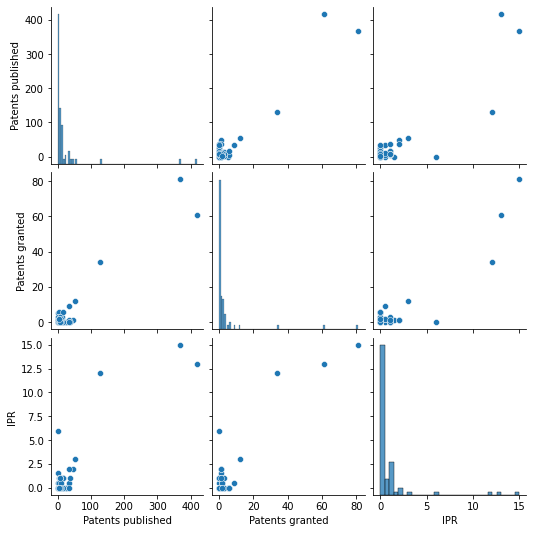

In [ ]:
#RP
#IPR
import numpy as np
from scipy.stats import kurtosis
DF=D[['Patents published','Patents granted','IPR']]
import seaborn as sns
sns.pairplot(data=DF)
DF.isnull().sum()
DF['Patents granted']=(DF['Patents granted'])**(1/6)
DF['Patents published']=(DF['Patents published'])**(1/5)   
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(DF.iloc[:,0:2])
model=LinearRegression()
model.fit(x_poly,DF.iloc[:,-1])
DF['IPR_pred']=model.predict(x_poly) 
for ix in DF.index:
  if(DF.loc[ix]['IPR_pred']>DF['IPR'].max() or DF.loc[ix]['IPR_pred']<DF['IPR'].min()):
    DF.loc[ix]['IPR_pred']=DF.loc[ix]['IPR']

Footprint of Projects and professional practice

In [ ]:
#FPPP
D1=D[['2017-18 Research funding','2016-17 Research funding','2015-16 Research funding','2017-18 Consultancy amount','2016-17 Consultancy amount','2015-16 Consultancy amount','Total Faculty Count','FPPP']]
D1
D1.isnull().sum()
D1['CF']=np.divide(np.divide(D1['2017-18 Consultancy amount']+D1['2016-17 Consultancy amount']+D1['2015-16 Consultancy amount'],3.0),D1['Total Faculty Count'])
D1['RF']=np.divide(np.divide(D1['2017-18 Research funding']+D1['2016-17 Research funding']+D1['2015-16 Research funding'],3.0),D1['Total Faculty Count'])
D1
D1['CF']=np.log2(D1['CF'])
D1['RF']=np.log2(D1['RF'])
D2=D1[['CF','RF','FPPP']]
D2
D2=D2.replace([-np.inf,np.inf],np.nan)
D2.dropna(inplace=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
D2[['CF','RF']]=sc.fit_transform(D2[['CF','RF']])
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(D2.iloc[:,0:2])
model=LinearRegression()
model.fit(x_poly,D2.iloc[:,-1])
D2['FPPP_pred']=model.predict(x_poly)
for ix in D2.index:
  if(D2.loc[ix]['FPPP_pred']>D2['FPPP'].max() or D2.loc[ix]['FPPP_pred']<D2['FPPP'].min()):
    D2.loc[ix]['FPPP_pred']=D2.loc[ix]['FPPP']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set 

Combined Metric for publications

In [ ]:
#PU*
A=D[['Publications','Current available faculty','Actual Student Strength','Total PHD students','PU']]
A['Nominal Faculty']=np.divide(A['Actual Student Strength']+A['Total PHD students'],15.0)
for ix in A.index:
  A.loc[ix,'FRQ']=A.loc[ix,'Current available faculty'] if A.loc[ix,'Current available faculty']>A.loc[ix,'Nominal Faculty'] else A.loc[ix,'Nominal Faculty']
A['FRQ']=np.round(A['FRQ'])
A['Ratio']=np.divide(A['Publications'],A['FRQ'])
Z=A[['Ratio','PU']]
Z['Ratio']=(Z['Ratio'])**(1/6)
Z.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(Z.iloc[:,0:1])
model=LinearRegression()
model.fit(x_poly,Z.iloc[:,-1])
Z['PU_pred']=model.predict(x_poly)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(Z.iloc[:,0:1])
model=LinearRegression()
model.fit(x_poly,Z.iloc[:,-1])
Z['PU_pred']=model.predict(x_poly)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

Combined metric for quality of publications

In [ ]:
#QP*
B=D[['Publications','Total Citation Count','Top25pp','FRQ','QP']]
B.isnull().sum()
B.dropna(inplace=True)
B['Cit_quality']=np.divide(B['Total Citation Count'],B['FRQ'])
B['Top_percentile']=np.divide(B['Top25pp'],B['Publications'])
F=B[['Cit_quality','Top_percentile','QP']]
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
Z=minmax.fit_transform(np.array(F))
d6=pd.DataFrame(data=Z,columns=F.columns)
F['Cit_quality']=d6['Cit_quality']
F['Top_percentile']=d6['Top_percentile']
F.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(F.iloc[:,0:2])
model=LinearRegression()
model.fit(x_poly,F.iloc[:,-1])
F['QP_pred']=model.predict(x_poly)
for ix in F.index:
  if(F.loc[ix]['QP_pred']>F['QP'].max() or F.loc[ix]['QP_pred']<F['QP'].min()):
    F.loc[ix]['QP_pred']=F.loc[ix]['QP']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/